In [ ]:
!pip install tensorflow
!pip install keras

In [2]:
TrainingImagePath="Face Images/Final Training Images"
TestingImagePath="Face Images/Final Testing Images"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    height_shift_range=0.1,
    width_shift_range=0.1,
    brightness_range=(0.5,1.5),
    zoom_range = [1, 1.5],
)
testing_datagen=ImageDataGenerator( rescale=1./255)



In [6]:
training_set = train_datagen.flow_from_directory(
    directory=TrainingImagePath,
    target_size=(64,64),
    batch_size=32,
)

Found 238 images belonging to 16 classes.


In [7]:
testing_set = testing_datagen.flow_from_directory(
    directory=TestingImagePath,
    target_size=(64,64),
    batch_size=32,
)

Found 64 images belonging to 16 classes.


In [8]:
testing_set.class_indices

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

In [9]:
trainClasses=training_set.class_indices
trainClasses

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

In [10]:
ResultMap={}
for faceValue,faceName in trainClasses.items():
    ResultMap[faceName]=faceValue

In [11]:
ResultMap

{0: 'face1',
 1: 'face10',
 2: 'face11',
 3: 'face12',
 4: 'face13',
 5: 'face14',
 6: 'face15',
 7: 'face16',
 8: 'face2',
 9: 'face3',
 10: 'face4',
 11: 'face5',
 12: 'face6',
 13: 'face7',
 14: 'face8',
 15: 'face9'}

In [13]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense


classifier= Sequential()

# STEP--1 Convolution
classifier.add(Convolution2D(filters=10, kernel_size=(3, 3), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

# STEP--2 MAX Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))


classifier.add(Convolution2D(filters=4, kernel_size=(5, 5), strides=(2, 2), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))


'''# STEP--3 FLattening'''
classifier.add(Flatten())

'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))

# Output layer
classifier.add(Dense(16, activation='sigmoid'))

'''# Compiling the CNN'''

classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])


d:\Softwares\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
classifier.fit(
        training_set,
        steps_per_epoch=8,
        epochs=100,
        validation_data=testing_set,
        validation_steps=2,       
        
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.5966 - loss: 0.1483 - val_accuracy: 0.4219 - val_loss: 0.1725
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.5756 - loss: 0.1461 - val_accuracy: 0.4844 - val_loss: 0.1616
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.5756 - loss: 0.1470 - val_accuracy: 0.4531 - val_loss: 0.1670
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.6387 - loss: 0.1401 - val_accuracy: 0.4688 - val_loss: 0.1647
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.6008 - loss: 0.1435 - val_accuracy: 0.5000 - val_loss: 0.1573
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.6218 - loss: 0.1378 - val_accuracy: 0.4844 - val_loss: 0.1560
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.6429 - loss: 0.1402 - val_accuracy: 0.4844 - val_loss: 0.1605
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.6134 - loss: 0.1391 - val_accuracy: 0.5156 - v

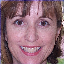

In [18]:
import numpy as np
from keras.preprocessing import image

testImage = r"Face Images\Final Testing Images\face5\3face5.jpg"
test_image = image.load_img(testImage, target_size=(64,64))
test_image

In [23]:

test_image_array=image.img_to_array(test_image)
print(test_image_array.shape,'\n')


test_image_array_exp_dim=np.expand_dims(test_image_array,axis=0)
print(test_image_array_exp_dim.shape, '\n')


result=classifier.predict(test_image_array_exp_dim)

# print('### Printing probabilities for each class ###')
print(result, '\n')

# print('### Printing original face mapping ###')
print(ResultMap, '\n')

# print('####'*10)
print('Prediction: This is ',ResultMap[np.argmax(result)])

(64, 64, 3) 

(1, 64, 64, 3) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] 

{0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'} 

Prediction: This is  face5
